# Wave

In [ ]:
import wave
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/Speech_Recognation/Basic/01-basics_output.wav"
obj = wave.open(file_path,"rb")

print("Number of channels : ", obj.getnchannels())
print("Sample Width : ",obj.getsampwidth())
print("Frame Rate : ", obj.getframerate())
print("Number Of Frames : " , obj.getnframes())
print("Parameters : ", obj.getparams())

Number of channels :  1
Sample Width :  2
Frame Rate :  16000
Number Of Frames :  80000
Parameters :  _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=80000, comptype='NONE', compname='not compressed')


In [ ]:
# Framerate / Sample_Rate;
t_audio = obj.getnframes() / obj.getframerate()
print("Duration : ",  t_audio)

print("".center(50,"-"))
frames = obj.readframes(-1)
print(type(frames), type(frames[0]))
print(len(frames))

obj.close()

Duration :  5.0
--------------------------------------------------
<class 'bytes'> <class 'int'>
160000


In [ ]:
obj_new = wave.open("/content/drive/MyDrive/Speech_Recognation/Basic/new.wav","wb")
obj_new.setnchannels(1)
obj_new.setsampwidth(2)
obj_new.setframerate(16000.0)
obj_new.writeframes(frames)

obj_new.close()

In [ ]:
obj = wave.open(file_path,"rb")

sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)

obj.close()

t_audio = n_samples / sample_freq

#  Plot

In [ ]:
obj = wave.open(file_path,"rb")

sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)

obj.close()

t_audio = n_samples / sample_freq
print(t_audio)

5.0


In [ ]:
signal_array = np.frombuffer(signal_wave, dtype = np.int16)
times = np.linspace(0,t_audio,num = n_samples)

In [ ]:
max(times),min(times),len(times),len(signal_array)

(5.0, 0.0, 80000, 80000)

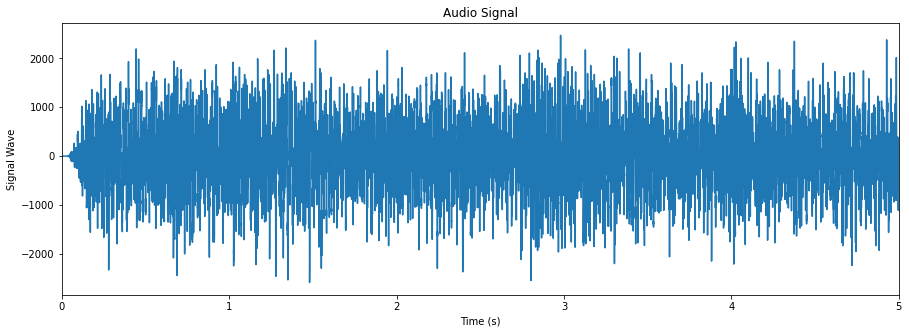

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(times,signal_array)
plt.title("Audio Signal")
plt.ylabel("Signal Wave")
plt.xlabel("Time (s)")
plt.xlim(0,t_audio)
plt.show()

## PyAudio

In [ ]:
%%capture
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install PyAudio

In [ ]:
import pyaudio
import wave

In [ ]:
import pyaudio
import time
import wave

FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000

p = pyaudio.PyAudio()

stream = p.open(
    format = FORMAT,
    channels = CHANNELS,
    rate= RATE,
    input = True,
    frames_per_buffer = FRAMES_PER_BUFFER
    )

print("Start Recording")

seconds = 5
frames = []
for i in range(0,int(RATE / FRAMES_PER_BUFFER * seconds)):
    data = stream.read(FRAMES_PER_BUFFER)
    frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()

obj = wave.open("output.wav","wb")
obj.setnchannels(CHANNELS)
obj.setsampwidth(p.get_sample_size(FORMAT))
obj.setframerate(RATE)
obj.writeframes(b"".join(frames))
obj.close()

## Load MP3

In [ ]:
%%capture
!pip install pydub

In [ ]:
from pydub import AudioSegment

In [ ]:
audio = AudioSegment.from_wav(file_path)
audio

In [ ]:
audio = audio + 6 
audio = audio*2

# Slow Audio !!
audio = audio.fade_in(2000)

audio.export("test.mp3",format="mp3")
audio2 = AudioSegment.from_mp3("test.mp3")
print("Done!!!")

Done!!!
